  Annual Salary Range  Frequency  RelFreq, %  CumRelFreq, %
0               70-90          9       16.98          16.98
1              90-110         22       41.51          58.49
2             110-130         11       20.75          79.24
3             130-150          4        7.55          86.79
4             150-170          3        5.66          92.45
5             170-190          1        1.89          94.34
6             190-210          1        1.89          96.23
7             250-270          1        1.89          98.12
8             330-350          1        1.89         100.01


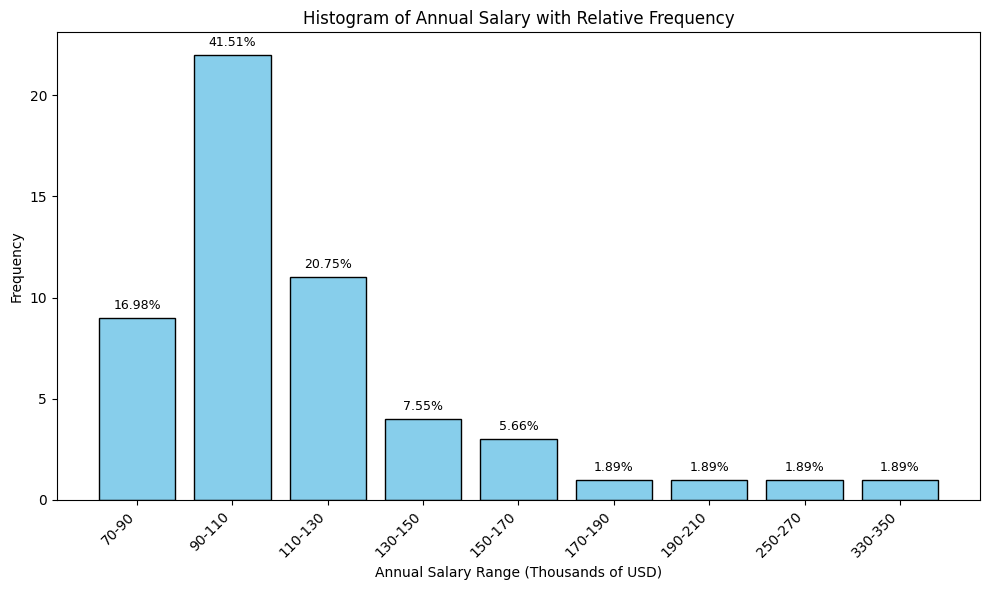

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = r'F:\Statistics for Data Analysis\Statistics+for+Data+Analysis_MY\SQL\Statistics for Data Analysis.xlsx'
sheet_name = 'Numerical Distributions'
column_name = 'Annual Salary (Thousands of USD)'

df = pd.read_excel(file_path, sheet_name=sheet_name)
salaries = df[column_name].dropna()

# Define the bin step and starting point 
step = 20
start = 70

# Calculate BinStart for each salary
df['BinStart'] = ((salaries - start) // step) * step + start
df['BinStart'] = df['BinStart'].astype(int)  # ensure integer

# Group by BinStart and count frequency
table = (
    df.groupby('BinStart')
      .size()
      .reset_index(name='Frequency')
      .sort_values(by='BinStart')
      .reset_index(drop=True)
)

# Add BinEnd and Label columns
table['BinEnd'] = table['BinStart'] + step
table['Annual Salary Range'] = table['BinStart'].astype(str) + '-' + table['BinEnd'].astype(str)

# CALCULATE RELATIVE & CUMULATIVE FREQUENCY
table['RelFreq, %'] = (table['Frequency'] / table['Frequency'].sum() * 100).round(2)
table['CumRelFreq, %'] = table['RelFreq, %'].cumsum().round(2)

# Reorder columns
table = table[['Annual Salary Range', 'Frequency', 'RelFreq, %', 'CumRelFreq, %']]

# DISPLAY TABLE
print(table)

# PLOT HISTOGRAM 
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(table['Annual Salary Range'], table['Frequency'], color='skyblue', edgecolor='black')

# Add relative frequency labels above each bar
for bar, rf in zip(bars, table['RelFreq, %']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.3, f"{rf:.2f}%", 
            ha='center', va='bottom', fontsize=9)

# Axis and title
ax.set_xlabel("Annual Salary Range (Thousands of USD)")
ax.set_ylabel("Frequency")
ax.set_title("Histogram of Annual Salary with Relative Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

